<a href="https://colab.research.google.com/github/injoon-pij/dlnlp-learning/blob/main/dlnlp_text_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Tokenization

* 주어진 코퍼스(corpus)를 토큰(token) 단위로 나누는 작업. 토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의합니다.

---

## 1.1 Word Tokenization

* 토큰의 단위을 단어(word)로 하는 토큰화

* (예) "Time is an illusion. Lunchtime double so!"
 * "Time", "is", "an", "illustion", "Lunchtime", "double", "so"

* 토큰화 작업은 위와 같이 단순히 구두점이나 특수문자를 전부 제거하는 정제(cleaning) 작업만으로 해결되지 않음.
 * 문장의 경계를 파악하는데 도움이 되므로 단어를 뽑아낼 때 마침표(.)를 제외하지 않는 경우
 * 단어 자체에서 구두점을 갖고 있는 경우 (m.p.h, Ph.D)
 * 특수문자가 토큰의 의미를 구성하는 데에 필요한 경우 ($45.55(가격), 01/02/06(날짜))
 * 숫자 사이에 콤마(,)가 들어가는 경우 (123,456,789)
 * 줄임말이 포함된 경우 (we're, I'm). 이 때 단어가 줄임말로 쓰일 때 생기는 형태인 re 와 m 등을 "접어"라고 함
 * 단어 내에 띄어쓰기가 포함된 경우 (New York, rock 'n' roll)


* 위처럼 토큰화를 하다보면 토큰화의 기준을 생각해봐야 하는 경우가 발생함. 예를 들어 영어에서는 (')가 들어가있는 단어를 어떻게 토큰으로 분류해야하는가라는 문제가 있음.
 * 이 경우 토큰화 목적에 따라 각각 다른 토큰화 도구를 사용

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# word_tokenize
from nltk.tokenize import word_tokenize  
print(word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))  

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [ ]:
# WordPunctTokenizer
from nltk.tokenize import WordPunctTokenizer  
print(WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [ ]:
# text_to_word_sequence
from tensorflow.keras.preprocessing.text import text_to_word_sequence
print(text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


* __word_tokenize (nltk)__
 * Don't를 Do와 n't로 분리하였으며, Jone's는 Jone과 's로 분리함

* __WordPunctTokenizer (nltk)__
 * Don't를 Don과 '와 t로 분리하였으며, Jone's도 Jone과 '와 s로 분리함
 * 구두점을 별도로 분리함

* __text_to_word_sequence (keras)__
 * 기본적으로 모든 알파벳을 소문자로 바꾸면서 마침표나 컴마, 느낌표 등의 구두점을 제거함
 * don't나 jone's와 같은 경우에는 분리하지 않고 보존함


[참고]

* Penn Treebank Tokenization
 * 표준으로 쓰이고 있는 토큰화 방법 중 하나
 * 토큰화 규칙
   1. 하이푼으로 구성된 단어는 하나로 유지
   2. doesn't와 같이 (')로 접어가 함께하는 단어는 분리

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print(tokenizer.tokenize(text))

['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


 * 결과를 보면, 규칙에 따라서 "home-based"는 하나의 토큰으로, "dosen't"는 "does"와 "n't"로 분리되었음

---

## 1.2 Sentence Tokenization

* 토큰의 단위를 문장(sentence)으로 하는 토큰화
 * 문장 분류(sentence segmentation)라고도 부름

* !나 ?는 문장의 구분을 위한 꽤 명확한 구분자(boundary) 역할을 하지만 마침표는 꼭 그렇진 않음.
 * 예) Since I'm actively looking for __Ph.D.__ students, I get the same question a dozen times every year.

[영어 문장 토큰화 수행]

In [ ]:
from nltk.tokenize import sent_tokenize
text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print(sent_tokenize(text))

['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [ ]:
text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print(sent_tokenize(text))

['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


[한국어 문장 토큰화 수행]

In [ ]:
pip install kss

In [ ]:
import kss

In [ ]:
text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어려워요. 농담아니에요. 이제 해보면 알걸요?'
print(kss.split_sentences(text))

['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어려워요. 농담아니에요.', '이제 해보면 알걸요?']


[참고]

문장 토큰화에서 예외를 발생시키는 마침표 처리를 위해서 입력에 따라 두 클래스로 분류하는 __이진 분류기(binary classifier)__를 사용하기도 함

1. 마침표(.)가 단어의 일부분일 경우. 즉, 마침표가 약어(abbreivation)로 쓰이는 경우
2. 마침표(.)가 정말로 문장의 구분자(boundary)일 경우

이진 분류기는 임의로 정한 여러가지 규칙을 코딩한 함수일 수도 있으며, 머신 러닝을 통해 구현될 수도 있음

* 마침표가 어떤 클래스에 속하는지 결정하기 위해서는 어떤 마침표가 주로 약어(abbreviation)으로 쓰이는 지 알아야함.
 * [영어 약어 사전](https://public.oed.com/how-to-use-the-oed/abbreviations/)
 * [문장 토큰화 규칙을 짤 때, 발생할 수 있는 여러가지 예외사항을 다룬 참고 자료](https://www.grammarly.com/blog/engineering/how-to-split-sentences/)

## 1.3 Tokenization (Korean)

[한국어 토큰화의 어려움]

1. 한국어가 교착어이기 때문에

 * 교착어란 조사, 어미 등을 붙여서 말을 만드는 언어를 말함
 * 예를 들어, '그가','그에게','그를' 등 같은 단어임에도 서로 다른 조사가 붙어서 다른 단어로 인식됨
 * 즉 띄어쓰기 단위로 토큰화를 해도 일정 수준 잘 작동하는 영어와 달리, 한국어는 어절이 독립된 단어로 구성되어 있는 것이 아니라 조사 등의 무언가가 붙어있는 경우가 매우 많기 때문에 띄어쓰기만으로는 토큰화가 부족하고 형태소 토큰화가 필요

2. 대부분의 코퍼스에서 한국어는 띄어쓰기가 영어보다 잘 지켜지지 않기 때문에

 * 한국어는 영어권 언어와 비교하여 띄어쓰기가 어렵고, 또 잘 지켜지지 않는 경향이 있음 
 * 이에 관한 가장 기본적인 견해는 한국어는 띄어쓰기가 잘 지켜지지 않아도 글을 쉽게 이해할 수 있기 때문임
    * 예) 이렇게띄어쓰기를전혀하지않고글을썼다고하더라도글을이해할수있다.

## 1.4 Part-of-speech(Pos) tagging

* 품사 태깅(part-of-speech tagging) : 단어 토큰화 과정에서 각 단어가 어떤 품사로 쓰였는지를 구분해놓는 과정
 * 표기는 같지만 품사에 따라서 단어의 의미가 달라지기도 하므로, 이를 위해서는 단어가 어떤 품사인지 아는 것이 중요하기도 함. 

* 영어

In [ ]:
# NLTK Penn Treebank POS Tags

from nltk.tokenize import word_tokenize
text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
print(word_tokenize(text))

['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.tag import pos_tag
x = word_tokenize(text)
pos_tag(x)

[('I', 'PRP'),
 ('am', 'VBP'),
 ('actively', 'RB'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('Ph.D.', 'NNP'),
 ('students', 'NNS'),
 ('.', '.'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('Ph.D.', 'NNP'),
 ('student', 'NN'),
 ('.', '.')]

* 한국어

KoNLPy (파이썬 패키지)
 * 형태소 분석기 종류 : Okt(Open Korea Text), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)
 * 형태소 분석기는 성능과 결과가 다르게 나오기 때문에, 사용하고자 하는 필요 용도에 따라 선택할 필요. 예를 들어서 속도를 중시한다면 메캅을 사용하는 것이 유리.

In [ ]:
pip install konlpy

In [ ]:
# KONLPY Okt

from konlpy.tag import Okt  
okt = Okt()  

In [ ]:
# 형태소 추출
print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']


In [ ]:
# 품사 태깅
print(okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]


In [ ]:
# 명사 추출
print(okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

['코딩', '당신', '연휴', '여행']


In [ ]:
# KONLPY Kkma

from konlpy.tag import Kkma  
kkma = Kkma()  

In [ ]:
print(kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']


In [ ]:
print(kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]


In [ ]:
print(kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

['코딩', '당신', '연휴', '여행']


# 2) Cleaning & Normalization

## 2.1 Cleaning

정제(cleaning) : 갖고 있는 코퍼스로부터 노이즈 데이터를 제거

 * 토큰화 작업에 방해가 되는 부분들을 배제하고 작업을 수행하기 위해서 작업에 앞서 수행하기도 하지만, 이후에도 여전히 남아있는 노이즈들을 제거하기위해 이후에도 지속적으로 이루어지기도 함

 * 불필요한 단어의 제거

   정제 작업에서 제거해야하는 노이즈 데이터는 자연어가 아니면서 아무 의미도 갖지 않는 글자들(특수 문자 등)을 의미하기도 하지만, 분석하고자 하는 목적에 맞지 않는 불필요 단어들을 노이즈 데이터라고 하기도 함.

   * 등장 빈도가 적은 단어

       때론 텍스트 데이터에 너무 적게 등장해 자연어 처리에 도움되지 않는 단어들이 존재함. 예를 들어 10000개의 메일 데이터에서 총 5번 밖에 등장하지 않은 단어가 있다면 이 단어는 문제 해결에 거의 도움이 되지 않을 것임.

   * 길이가 짧은 단어

      영어권 언어에서는 길이가 짧은 단어들은 대부분 불용어에 해당하므로 이들을 삭제하는 것만으로도 효과적인 정제를 수행할 수 있기도 함. 예를 들어 길이가 2 이하인 단어를 제거하는 것만으로도 자연어 처리에서 큰 의미를 가지지 않는 관사 'a', 주어 'I' , 그리고 'it, at, to, on, in, by' 과 같은 대부분의 불용어들이 제거됨. 
      
      하지만 한국어에서는 이런 방법이 크게 유효하지 않은데, 이는 영어의 단어 길이 평균이 한국어의 단어 길이 평균보다 길기 때문임. 이는 영어 단어와 한국어 단어에서 각 한 글자가 가진 의미의 크기가 다르기 때문이라고 볼 수 있음. 예를 들어 '학교'라는 한국어 단어의 경우, 배울 학(學)과 학교 교(校)로 글자 하나하나가 이미 함축적인 의미를 갖고있어 두 글자만으로 학교라는 단어를 표현함. 하지만 영어의 경우에는 학교라는 글자를 표현하기 위해서는 s, c, h, o, o, l이라는 총 6개의 글자가 필요함.

## 2.2 Normalization

정규화(normalization) : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어줌

 * 규칙에 기반한 표기가 다른 단어들의 통합
  
   필요에 따라 직접 코딩을 통해 정의할 수 있는 정규화 규칙을 통해 같은 의미를 지녔지만 표기가 다른 단어들을 하나의 단어로 정규화하는 방법을 사용할 수 있음. 예를 들어 USA와 US는 같은 의미를 가지므로, 하나의 단어로 정규화할 수 있고, uh-huh와 uhhuh는 형태는 다르지만 여전히 같은 의미를 가졌다고 볼 수 있음.

 * 대, 소문자 통합

   영어권 언어에서 대문자는 문장의 맨 앞 등과 같은 특정 상황에서만 쓰이고, 대부분의 글은 소문자로 작성되기 때문에 대, 소문자 통합 작업은 대부분 대문자를 소문자로 변환하는 소문자 변환작업으로 이루어지게 됨. 물론 대문자와 소문자가 구분되어야 하는 경우도 있기 때문에 무작정 통합해서는 안 됨.  가령 미국을 뜻하는 단어 US와 우리를 뜻하는 us는 구분되어야 하고, 회사 이름(General Motors)나, 사람 이름(Bush) 등은 대문자로 유지되는 것이 나음.

# 3) Lemmatization & Stemming

정규화(normalization) 기법 중 코퍼스의 단어의 개수를 줄일 수 있는 기법인 표제어 추출(lemmatization)과 어간 추출(stemming)의 개념에 대해서 알아보고 이 둘의 결과가 어떻게 다른지 이해

## 3.1 Lemmatization

* 표제어 추출은 단어들이 각기 다른 형태를 가지더라도, 공유하는 하나의 뿌리 단어를 찾아가는 과정을 말함. 예를 들어서 am, are, is는 서로 다른 스펠링이지만 그 뿌리 단어는 be라고 볼 수 있으므로 이 단어들의 표제어는 be라고 함

In [ ]:
# NLTK WordNetLemmatizer

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
n = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting', 'is']
print([n.lemmatize(w) for w in words])

['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting', 'is']


* 표제어 추출기에 본래 단어의 품사 정보를 제공함으로써 더욱 정확한 Lemma 결과를 얻을 수 있음.

In [ ]:
n.lemmatize('dies', 'v')

'die'

In [ ]:
n.lemmatize('watched', 'v')

'watch'

In [ ]:
n.lemmatize('has', 'v')

'have'

In [ ]:
n.lemmatize('starting', 'v')

'start'

In [ ]:
n.lemmatize('is', 'v')

'be'

## 3.2 Stemming

* 어간 추출은 어간(Stem)을 추출하는 작업을 말함. 

* 어간 추출은 형태학적 분석을 단순화한 버전, 즉 정해진 단순 규칙에 기반한 단어의 어미를 자르는 대략적인 작업이라고 볼 수 있음. 
 * 이 작업은 섬세한 작업이 아니기 때문에 어간 추출 후에 나오는 출력 단어는 사전에 존재하지 않는 단어일 수도 있음.

In [ ]:
# NLTK PorterStemmer

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
s = PorterStemmer()

* 포터 알고리즘의 어간 추출 규칙 예시

 * ALIZE → AL
 * ANCE → 제거
 * ICAL → IC

In [ ]:
words=['formalize', 'allowance', 'electricical']
print([s.stem(w) for w in words])

['formal', 'allow', 'electric']


In [ ]:
# NLTK Lancaster Stemmer
## Porter Stemmer와 비교

from nltk.stem import PorterStemmer, LancasterStemmer
s = PorterStemmer()
l = LancasterStemmer()

words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

In [ ]:
# Porter
print([s.stem(w) for w in words])

['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']


In [ ]:
# Lancaster
print([l.stem(w) for w in words])

['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


---

__Lemmatization vs. Stemming__

* 표제어 추출은 문맥을 고려하며, 해당 단어의 품사 정보를 보존한다.

* 어간 추출을 수행한 결과는 품사 정보가 보존되지 않는다. 더 정확히는, 어간 추출을 한 결과는 사전에 존재하지 않는 단어일 경우가 많다.

* Lemmatization
 * am → be
 * the going → the going
 * having → have

* Stemming
 * am → am
 * the going → the go
 * having → hav

# 4) Stopword

* 불용어란 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어들을 말함. 
 * 예를 들어, I, my, me, over, 조사, 접미사 같은 단어들은 문장에서는 자주 등장하지만 실제 의미 분석을 하는데는 거의 기여하는 바가 없음.

* 불용어는 패키지 내에 정의되어있는 것을 사용해도 되고 개발자가 직접 정의할 수도 있음.


* 영어

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# 불용어 확인
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
# 불용어 제거
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(example)

result=[word for word in word_tokens if not word in stop_words]

print(word_tokens) 
print(result) 

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


* 한국어
 * [한국어 불용어 리스트](https://www.ranks.nl/stopwords/korean)
 * [한국어 불용어 리스트2](https://bab2min.tistory.com/544)
 * 절대적인 리스트는 아님. 목적에 맞게 선택 필요

In [ ]:
# 불용어 제거
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = ['아무거나', '아무렇게나', '어찌하든지', '같다', '비슷하다', '예컨대', '이럴정도로', '하면', '아니거든']

word_tokens = word_tokenize(example)

result=[word for word in word_tokens if not word in stop_words]

print(word_tokens) 
print(result)

['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']
['고기를', '구우려고', '안', '돼', '.', '고기라고', '다', '같은', '게', '.', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']


# 5) Integer Encoding

* 각 단어에 단어와 맵핑되는 고유한 정수, 다른 표현으로는 인덱스를 부여하는 과정
 * 원-핫 인코딩, 워드 임베딩 등의 과정을 위해 필요함

* 단어에 정수를 부여하는 방법 중 하나로 단어를 빈도수 순으로 정렬한 단어 집합(vocabulary)을 만들고, 빈도수가 높은 순서대로 차례로 낮은 숫자부터 정수를 부여하는 방법이 있다.

## 5.1 Dictionary

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

text = '''A barber is a person. a barber is good person. a barber is huge person.
          he Knew A Secret! The Secret He Kept is huge secret. Huge secret. 
          His barber kept his word. a barber kept his word. His barber kept his secret.
          But keeping and keeping such a huge secret to himself was driving the barber crazy. 
          the barber went up a huge mountain.'''

In [ ]:
# sentence tokenization
text = sent_tokenize(text)

# cleaning & word tokenization
vocab = {}
sentences = []
stop_words = set(stopwords.words('english'))

for i in text:
    sentence = word_tokenize(i) # 단어 토큰화를 수행합니다.
    result = []

    for word in sentence: 
        word = word.lower()           # 소문자로 변환
        if word not in stop_words:    # 불용어 제거
            if len(word) > 2:         # 단어 길이 제한
                result.append(word)
                if word not in vocab: # 빈도수 포함된 단어 집합 생성
                    vocab[word] = 0 
                vocab[word] += 1
    sentences.append(result) 
    
print(sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [ ]:
print(vocab) # 키(key) : 단어 / 값(value) : 빈도수

{'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [ ]:
# 빈도수 높은 순서대로 정렬
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

# 높은 빈도수를 가진 단어일수록 낮은 정수 인덱스를 부여
word_to_index = {}
i = 0
for (word, frequency) in vocab_sorted :
    if frequency > 1 : # Cleaning : 빈도수 제한
        i = i + 1
        word_to_index[word] = i

print(word_to_index)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]
{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


* sorted(..., key = ..., reverse = ...)
 * key : 정렬의 기준이 되는 값
 * reverse : True 시 내림차순, False 시 오름차순

자연어처리에서는 vocab의 단어를 전부 사용하는 것이 아니라 빈도수가 높은 n개의 단어만을 사용하고자 vocab_size를 정하고, 그 외 빈도수가 낮은 단어들은 OOV(Out of Vocabulary)로 취급하는 경우가 많음

In [ ]:
# 단어 집합 크기 지정
vocab_size = 5

# vocab_size에 포함되지 않는 단어들
words_frequency = [w for w, c in word_to_index.items() if c >= vocab_size + 1]

# 해당 단어들에 대한 인덱스 정보를 삭제
for w in words_frequency:
    del word_to_index[w]

print(word_to_index)

# 단어 집합에 없는 단어들을 위한 'OOV' 인덱스 지정
word_to_index['OOV'] = len(word_to_index) + 1

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}
{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


정의한 word_to_index를 사용하여 sentences의 모든 단어들을 정수로 각각 인코딩함. 단어 집합에 없는 단어들은 'OOV' 인덱스로 인코딩함.

In [ ]:
# Integer Encoding

encoded = []
for s in sentences:
    temp = []
    for w in s:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index['OOV'])
    encoded.append(temp)
print(encoded)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


## 5.2 Counter()

In [ ]:
from collections import Counter

In [ ]:
print(sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [ ]:
# 단어 리스트 생성
words = sum(sentences, []) # words = np.hstack(sentences)
print(words)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


* sum : 두번째 인자를 기준으로 첫번째 인자의 iterable한 object들을 순서대로 더함
 * 위 상황을 예로 들면,
 1. [  ] + ['barber', 'person']
 2. \+ ['barber', 'good', 'person']
 3. \+ ['barber', 'huge', 'person']

   ...

Counter()를 사용하여 단어집합(vocab) 생성

In [ ]:
# Counter : 단어 중복 제거 및 빈도수 기록
vocab = Counter(words) 
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


In [ ]:
# 단어 집합 크기 설정
vocab_size = 5

# 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab = vocab.most_common(vocab_size)
print(vocab)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]


In [ ]:
# 높은 빈도수를 가진 단어일수록 낮은 정수 인덱스 부여
word_to_index = {}
i = 0

for (word, frequency) in vocab :
    i = i + 1
    word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


## 5.3 nltk.FreqDist()

* Counter()와 같은 기능

In [ ]:
from nltk import FreqDist
import numpy as np

In [ ]:
# 단어 집합 생성
vocab = FreqDist(np.hstack(sentences))
vocab

FreqDist({'barber': 8,
          'crazy': 1,
          'driving': 1,
          'good': 1,
          'huge': 5,
          'keeping': 2,
          'kept': 4,
          'knew': 1,
          'mountain': 1,
          'person': 3,
          'secret': 6,
          'went': 1,
          'word': 2})

In [ ]:
# 단어 집합 크기 설정
vocab_size = 5
vocab = vocab.most_common(vocab_size)
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [ ]:
# 높은 빈도수를 가진 단어일수록 낮은 정수 인덱스 부여
word_to_index = {word[0] : index + 1 for index, word in enumerate(vocab)}
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


## 5.4 keras.preprocessing

정수 인코딩을 위해 케라스의 전처리 도구 사용

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

fit_on_texts()에 코퍼스를 입력으로 주면 코퍼스 내부의 각 단어들의 빈도수를 기준으로 단어 집합을 생성함

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

print(tokenizer.word_index) # 각 단어에 부여된 인덱스 확인
print(tokenizer.word_counts) # 각 단어의 빈도수 확인

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}
OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [ ]:
# word_index를 사용하여 sentences의 단어들 정수 인코딩
print(tokenizer.texts_to_sequences(sentences))

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


빈도수가 높은 상위 n개의 단어만 사용하여 단어 집합을 생성한 뒤 정수 인코딩 진행

In [ ]:
vocab_size = 5

tokenizer = Tokenizer(num_words = vocab_size + 1) # 상위 5개 단어만 사용
tokenizer.fit_on_texts(sentences)

* num_words 인자가 vocab_size 이 아닌 vocab_size + 1 인 이유는, num_words는 숫자를 0부터 카운트하기 때문.

* word_index에 실질적으로 숫자 0에 해당하는 단어가 존재하지 않음에도 tokenizer가 숫자 0까지 단어 집합의 크기로 산정하는 이유는 패딩(padding) 토큰에 해당하는 인덱스를 0으로 두기 때문.

In [ ]:
# num_words 적용은 text_to_sequences를 사용할 때만 적용

print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(sentences))

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}
OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])
[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


위의 경우, 단어집합에 없는 단어인 OOV에 대해서 아예 인코딩을 진행하지 않고 출력 결과에서 해당 단어를 제거해 버렸음.

이 단어들을 OOV로 간주하여 보존하고 싶다면 Tokenizer의 인자 oov_token을 사용하면 됨.

In [ ]:
vocab_size = 5

tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token = 'OOV') # 빈도수 상위 5개 단어만 사용
tokenizer.fit_on_texts(sentences)

* 패딩 토큰과 OOV 토큰을 고려하여 num_words 인자는 vocab_size + 2

In [ ]:
# word_index에 'OOV' 토큰이 정수 1로 맵핑되어 저장되어 있음 

print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(sentences))

{'OOV': 1, 'barber': 2, 'secret': 3, 'huge': 4, 'kept': 5, 'person': 6, 'word': 7, 'keeping': 8, 'good': 9, 'knew': 10, 'driving': 11, 'crazy': 12, 'went': 13, 'mountain': 14}
OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])
[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


# 6) Padding

* 자연어처리의 병렬 연산을 위해서 길이가 다른 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업
* 케라스 전처리를 통해 얻은 단어집합에서 패딩 토큰의 인덱스의 기본값은 0

In [ ]:
# keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], 
             ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], 
             ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], 
             ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

In [ ]:
# Integer Encoding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences) # 빈도수를 기준으로 단어 집합 생성
encoded = tokenizer.texts_to_sequences(sentences) # 정수 인코딩
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [ ]:
# padding
padded = pad_sequences(encoded)
print(padded)

[[ 0  0  0  0  0  1  5]
 [ 0  0  0  0  1  8  5]
 [ 0  0  0  0  1  3  5]
 [ 0  0  0  0  0  9  2]
 [ 0  0  0  2  4  3  2]
 [ 0  0  0  0  0  3  2]
 [ 0  0  0  0  1  4  6]
 [ 0  0  0  0  1  4  6]
 [ 0  0  0  0  1  4  2]
 [ 7  7  3  2 10  1 11]
 [ 0  0  0  1 12  3 13]]


문장의 앞이 아닌 뒷부분을 패딩으로 채우고 싶다면 padding 인자를 post로 지정하면 됨

In [ ]:
# padding : 문장 후반부에 패딩
padded = pad_sequences(encoded, padding = 'post')
print(padded)

[[ 1  5  0  0  0  0  0]
 [ 1  8  5  0  0  0  0]
 [ 1  3  5  0  0  0  0]
 [ 9  2  0  0  0  0  0]
 [ 2  4  3  2  0  0  0]
 [ 3  2  0  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  2  0  0  0  0]
 [ 7  7  3  2 10  1 11]
 [ 1 12  3 13  0  0  0]]


동일하게 맞추는 문장의 길이를 가장 긴 문장의 길이가 아닌 특정 길이로 max_len 인자를 통해 지정할 수 있음
 * 단, 문장 길이가 지정된 길이보다 긴 경우 해당 문장은 지정 길이 이상의 토큰에 대해서는 데이터가 손실됨 

In [ ]:
padded = pad_sequences(encoded, padding = 'post', maxlen = 5)
print(padded)

[[ 1  5  0  0  0]
 [ 1  8  5  0  0]
 [ 1  3  5  0  0]
 [ 9  2  0  0  0]
 [ 2  4  3  2  0]
 [ 3  2  0  0  0]
 [ 1  4  6  0  0]
 [ 1  4  6  0  0]
 [ 1  4  2  0  0]
 [ 3  2 10  1 11]
 [ 1 12  3 13  0]]


value 인자를 지정하면 0이 아닌 다른 숫자로 패딩을 할 수도 있음 

In [ ]:
last_value = len(tokenizer.word_index) + 1 # 단어 집합의 크기보다 1 큰 숫자를 사용

padded = pad_sequences(encoded, padding = 'post', value = last_value)
print(padded)

[[ 1  5 14 14 14 14 14]
 [ 1  8  5 14 14 14 14]
 [ 1  3  5 14 14 14 14]
 [ 9  2 14 14 14 14 14]
 [ 2  4  3  2 14 14 14]
 [ 3  2 14 14 14 14 14]
 [ 1  4  6 14 14 14 14]
 [ 1  4  6 14 14 14 14]
 [ 1  4  2 14 14 14 14]
 [ 7  7  3  2 10  1 11]
 [ 1 12  3 13 14 14 14]]


# 7) One-hot encoding

단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어 벡터 표현 방식

In [ ]:
# keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

t = Tokenizer()
t.fit_on_texts([text]) # 빈도수를 기준으로 단어 집합 생성

In [ ]:
# 단어 집합에 속한 단어들로만 구성된 텍스트
sub_text = "점심 먹으러 갈래 메뉴는 햄버거 최고야"

encoded = t.texts_to_sequences([sub_text])[0] # 정수 인코딩
print(encoded)

[2, 5, 1, 6, 3, 7]


In [ ]:
# one-hot encoding
one_hot = to_categorical(encoded)
print(one_hot)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


# 8) Spliting Data

머신러닝을 위한, 그중에서도 지도 학습을 위한 데이터 분리 학습

## 8.1 Spliting X - Y

문제에 해당하는 X 데이터(주로 텍스트)와 정답 레이블에 해당하는 Y 데이터 분리

* zip()

In [ ]:
# zip()
X,y = zip(['a', 1], ['b', 2], ['c', 3])
print(X)
print(y)

('a', 'b', 'c')
(1, 2, 3)


In [ ]:
# 데이터가 2D 텐서 형태인 경우
sequences=[['a', 1], ['b', 2], ['c', 3]]
X,y = zip(*sequences) # * -> 리스트의 원소를 개별 입력인자로 zip() 함수에 넘겨주는 역할
print(X)
print(y)

('a', 'b', 'c')
(1, 2, 3)


```python
X,y = zip(sequences)

>>> 
ValueError: too many values to unpack (expected 2)
```

* DataFrame

In [ ]:
# DataFrame
import pandas as pd

values = [['당신에게 드리는 마지막 혜택!', 1],
          ['내일 뵐 수 있을지 확인 부탁드...', 0],
          ['도연씨. 잘 지내시죠? 오랜만입...', 0],
          ['(광고) AI로 주가를 예측할 수 있다!', 1]]

columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)
df

,메일 본문,스팸 메일 유무
0,당신에게 드리는 마지막 혜택!,1
1,내일 뵐 수 있을지 확인 부탁드...,0
2,도연씨. 잘 지내시죠? 오랜만입...,0
3,(광고) AI로 주가를 예측할 수 있다!,1


In [ ]:
X = df['메일 본문']
y = df['스팸 메일 유무']

In [ ]:
print(X)

0          당신에게 드리는 마지막 혜택!
1      내일 뵐 수 있을지 확인 부탁드...
2      도연씨. 잘 지내시죠? 오랜만입...
3    (광고) AI로 주가를 예측할 수 있다!
Name: 메일 본문, dtype: object


In [ ]:
print(y)

0    1
1    0
2    0
3    1
Name: 스팸 메일 유무, dtype: int64


* Numpy

In [ ]:
import numpy as np

ar = np.arange(0,16).reshape((4,4))
print(ar)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [ ]:
X = ar[:, :3]
print(X)

[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]


In [ ]:
y = ar[:,3]
print(y)

[ 3  7 11 15]


## 8.2 Spliting train - test

모델 훈련에 사용할 train data와 모델 평가에 사용할 test data 분리

* sklearn

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)

print(X)
print(list(y))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0, 1, 2, 3, 4]


In [ ]:
# 3분의 1만 test 데이터로 지정
# random_state 지정으로 데이터 순서가 섞인 채로 훈련 데이터와 테스트 데이터 분리됨
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

* X : 독립 변수 데이터. (배열이나 데이터프레임)
* y : 종속 변수 데이터. 레이블 데이터
* test_size : 테스트용 데이터 개수. 1보다 작은 실수인 경우, 비율을 나타냄
* train_size : 학습용 데이터 개수. 1보다 작은 실수인 경우, 비율을 나타냄
 * test_size와 train_size 중 하나만 기재해도 가능
* random_state : 난수 시드

In [ ]:
print(X_train)
print(X_test)

[[2 3]
 [4 5]
 [6 7]]
[[8 9]
 [0 1]]


In [ ]:
print(y_train)
print(y_test)

[1, 2, 3]
[4, 0]


* 직접 분리

```python
n_of_train = int(len(X) * 0.8) # 훈련 데이터 개수
n_of_test = int(len(X) - n_of_train) # 학습 데이터 개수

X_train = X[:n_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장
y_train = y[:n_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장
X_test = X[n_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
y_test = y[n_of_train:]  #전체 데이터 중에서 20%만큼 뒤의 데이터 저장
```

# 9) Text Preprocessing Tools for Korean Text

앞서 나온 형태소와 문장 토크나이징 도구들인 KoNLPy와 KSS(Korean Sentence Splitter)와 함께 유용하게 사용할 수 있는 한국어 전처리 패키지

## 9.1 PyKoSpacing 

* 한국어 띄어쓰기 패키지로 띄어쓰기가 되어있지 않은 문장을 띄어쓰기를 한 문장으로 변환해주는 패키지 (개발자 : 전희원님)

In [ ]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [ ]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

new_sent = sent.replace(" ", '') # 문장 내 띄어쓰기 제거
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


In [ ]:
from pykospacing import Spacing

spacing = Spacing()
kospacing_sent = spacing(new_sent) 

print(sent)
print(kospacing_sent) # 원문장과 동일

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


## 9.2 Py-Hanspell

* 네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지 (띄어쓰기도 보정)

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

In [ ]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "

spelled_sent = spell_checker.check(sent)
hanspell_sent = spelled_sent.checked

print(sent)
print(hanspell_sent)

맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 
맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


In [ ]:
spelled_sent = spell_checker.check(new_sent) # 9.1에서 사용한 new_sent
hanspell_sent = spelled_sent.checked

print(hanspell_sent)
print(kospacing_sent) # 앞서 사용한 kospacing 패키지에서 얻은 결과

김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


## 9.3 SOYNLP

* 품사 태깅, 단어 토큰화 등을 지원하는 단어 토크나이저 
* 비지도 학습으로 단어 토큰화를 한다는 특징을 갖고 있으며, 데이터에 자주 등장하는 단어들을 단어로 분석함
* 단어 토크나이저는 내부적으로 단어 점수 표로 동작하는데, 이 점수는 응집 확률(cohesion probability)과 브랜칭 엔트로피(branching entropy)를 활용함

In [ ]:
!pip install soynlp

In [ ]:
pip install konlpy

기존의 형태소 분석기는 신조어나 형태소 분석기에 등록되지 않은 단어 같은 경우에는 제대로 구분하지 못하는 단점이 있음

In [ ]:
from konlpy.tag import Okt
tokenizer = Okt()

print(tokenizer.morphs('에이비식스 이대휘 1월 최애돌 기부 요정'))

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']


* '에이비식스'는 아이돌의 이름이고, '이대휘'는 에이비식스의 멤버이며, '최애돌'은 최고로 애정하는 캐릭터라는 뜻이지만 위의 형태소 분석 결과에서는 전부 분리되어있음

* soynlp는 위와 같은 상황에서 __'에이비식스'라는 문자열이 자주 연결되어 등장한다면 한 단어라고 판단__하고, 뿐만 아니라 __'에이비식스'라는 단어 앞뒤에 '최고', '가수', '실력'과 같은 독립된 다른 단어들이 계속해서 등장한다면 에이비식스를 한 단어로 파악__하는 아이디어를 가진 토크나이저임

 * 즉 텍스트 데이터에서 __특정 문자 시퀀스가 함께 등장하는 빈도가 높고__, __앞뒤로 조사 또는 완전히 다른 단어가 등장하는 것을 고려해서 해당 문자 시퀀스를 형태소라고 판단__하는 단어 토크나이저

### 9.3.1 Train tokenizer

In [3]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [4]:
# Download data
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x7f293918d450>)

In [5]:
# 훈련 데이터를 다수의 문서로 분리
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [10]:
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

soynlp는 학습 기반의 단어 토크나이저이므로 기존의 KoNLPy에서 제공하는 형태소 분석기들과는 달리 코퍼스로부터 학습 과정을 거쳐야 함. 
 * 이는 전체 코퍼스로부터 __응집 확률(cohesion probability)__과 __브랜칭 엔트로피(branching entropy)__ 단어 점수표를 만드는 과정

In [11]:
# 전체 코퍼스에 대해 단어 점수표 계산
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 1.206 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


#### Cohesion probability

내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도

* 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그 다음 문자가 나올 확률을 계산하여 누적곱을 한 값

* 값이 높을수록 전체 코퍼스에서 해당 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높음

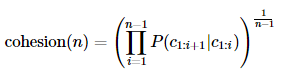

(ex) '반포한강공원에' 라는 문자시퀀스에 대한 각 내부 문자열의 응집확률

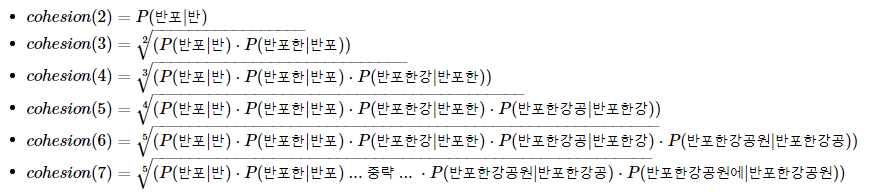

In [12]:
# 응집확률계산
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [13]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [14]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [15]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [16]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

* 응집확률은 '반포한강공원'일 때가 가장 높음. 즉 응집도를 통해 판단했을 때, 하나의 단어로 판단하기에 가장 적합한 문자열은 '반포한강공원'이라고 볼 수 있음.

#### Branching entropy

확률 분포의 엔트로피값을 사용하고, 주어진 문자열에서 얼마나 다음 문자가 등장할 수 있는지를 판단하는 척도
 
* 하나의 완성된 단어에 가까워질수록 문맥으로 인해 점점 정확히 예측할 수 있게 되면서 브랜칭 엔트로피의 값은 점점 줄어듬

In [17]:
# 브랜칭 엔트로피 계산
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [18]:
word_score_table["디스플"].right_branching_entropy

-0.0

In [19]:
word_score_table["디스플레"].right_branching_entropy

-0.0

* '디스' 다음에는 다양한 문자가 올 수 있어 1.63이라는 값을 가지는 반면, '디스플'라는 문자열 다음에는 '레'가, '디스플레'라는 문자열 다음에는 '이'가 오는 것이 명백하기 때문에 0이란 값을 가짐

In [20]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

* 문자 시퀀스 '디스플레이'라는 문자 시퀀스 다음에는 조사나 다른 단어와 같은 다양한 경우가 있을 수 있기 때문에 브랜칭 엔트로피 값이 증가함

* 이는 하나의 단어가 끝나면 그 경계 부분부터 다시 브랜칭 엔트로피 값이 증가하게 됨을 의미 
 * 이러한 값의 변화로 단어를 판단하는 것이 가능

### 9.3.2 L tokenizer

띄어쓰기로 단위로 나눈 한국어 어절 토큰을 L 토큰 + R 토큰으로 나눔

* 한국어의 띄어쓰기 단위로 나눈 어절 토큰은 주로 L 토큰 + R 토큰의 형식을 가질 때가 많음. 
 * '공원에' -> '공원 + 에'  
 * '공부하는' -> '공부 + 하는'
 
* 응집확률점수가 가장 높은 L 토큰을 찾아내는 것이 토큰 분리 기준

In [21]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

### 9.3.3 MaxScoreTokenizer

띄어쓰기가 되지 않는 문장에서 응집확률 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저

In [25]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

### 9.3.4 Normalizer

SNS나 채팅 데이터와 같은 한국어 데이터에는 ㅋㅋ, ㅎㅎ 등 불필요하게 연속되는 경우가 많은데 ㅋㅋ, ㅋㅋㅋ, ㅋㅋㅋㅋ와 같은 경우를 모두 서로 다른 단어로 처리하는 것은 불필요하므로 하나로 정규화시킴

In [26]:
from soynlp.normalizer import *

In [27]:
# 이모티콘 정규화
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


In [28]:
# 의미없는 반복 정규화
print(repeat_normalize('와하하하하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하핫', num_repeats=2))

와하하핫
와하하핫
와하하핫


## 9.4 Customized KoNLPy

* 형태소 분석기에 사용자 사전을 추가해주는 패키지

In [ ]:
pip install customized_konlpy

In [ ]:
from ckonlpy.tag import Twitter
twitter = Twitter()

In [ ]:
twitter.morphs('은경이는 사무실로 갔습니다.')

['은', '경이', '는', '사무실', '로', '갔습니다', '.']

* '은경이'는 사람이름이므로 분리하면 안되고, 최소한 '은경' 또는 '은경이'라는 단어 토큰을 얻어야 함

In [ ]:
twitter.add_dictionary('은경이', 'Noun')

* 형태소 분석기 Twitter에 add_dictionary('단어', '품사')와 같은 형식으로 사용자 사전 추가

In [ ]:
twitter.morphs('은경이는 사무실로 갔습니다.')

['은경이', '는', '사무실', '로', '갔습니다', '.']